**Dataset** You have been provided with alarms dataset. For each site there are multiple alarms generated.

**Your task**  You have to find the rules and apply Apriori algorithm on them.

In [18]:
import pandas as pd
import numpy as np
# For One-Hot encoding
from mlxtend.preprocessing import OnehotTransactions
# For Apriori Algorithm
from mlxtend.frequent_patterns import apriori
# For Association Rules
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
# For Network Gragh
import networkx as nx
%matplotlib inline
sns.set()

In [22]:
data = pd.read_csv('site_status.csv')
df = data.copy()
df

,date,site_name,site_status
0,5/16/2018,N0001,"A2,A3,A1,A4"
1,5/16/2018,N0002,"A5,A6,A7"
2,5/16/2018,N0003,on-air
3,5/16/2018,N0004,"A8,A6,A9 ,A10"
4,5/16/2018,N0005,"A11,on-air,A12,A13"
5,5/16/2018,N0006,"on-air,A14,A6,A114,A59"
6,5/16/2018,N0007,off-air
7,5/16/2018,N0008,"A11,A15,off-air,A16,A17"
8,5/16/2018,N0009,A18
9,5/16/2018,N0010,"on-air,A19"


In [23]:
df['site_name'] = df['site_name'].str.upper()
df['site_name'] = df['site_name'].str.strip()

df['site_status'] = df['site_status'].str.upper()
df['site_status'] = df['site_status'].str.strip()

In [25]:
df

,date,site_name,site_status
0,5/16/2018,N0001,"A2,A3,A1,A4"
1,5/16/2018,N0002,"A5,A6,A7"
2,5/16/2018,N0003,ON-AIR
3,5/16/2018,N0004,"A8,A6,A9 ,A10"
4,5/16/2018,N0005,"A11,ON-AIR,A12,A13"
5,5/16/2018,N0006,"ON-AIR,A14,A6,A114,A59"
6,5/16/2018,N0007,OFF-AIR
7,5/16/2018,N0008,"A11,A15,OFF-AIR,A16,A17"
8,5/16/2018,N0009,A18
9,5/16/2018,N0010,"ON-AIR,A19"


In [9]:
items = df['site_status'].str.split(',').values
type(items)

numpy.ndarray

In [10]:
items

array([list(['A2', 'A3', 'A1', 'A4']), list(['A5', 'A6', 'A7']),
       list(['ON-AIR']), list(['A8', 'A6', 'A9 ', 'A10']),
       list(['A11', 'ON-AIR', 'A12', 'A13']),
       list(['ON-AIR', 'A14', 'A6', 'A114', 'A59']), list(['OFF-AIR']),
       list(['A11', 'A15', 'OFF-AIR', 'A16', 'A17']), list(['A18']),
       list(['ON-AIR', 'A19']), list(['A5', 'A11', 'A20', 'A21', 'A22']),
       list(['A2', 'A5', 'ON-AIR', 'A14', 'A23', 'A6', 'A24', 'A21', 'A25']),
       list(['A26']), list(['A27', 'OFF-AIR', 'A28']),
       list(['A29', 'A5']), list(['A14', 'A30', 'A31', 'A32']),
       list(['A31']), list(['A33']), list(['A22']), list(['A34']),
       list(['A11']), list(['A14', 'A35']), list(['ON-AIR']),
       list(['A5', 'A9 ', 'A36', 'A37', 'A32']),
       list(['A5', 'A38', 'A11', 'A39', 'OFF-AIR', 'A24', 'A40', 'A41', 'A42', 'A43', 'A44']),
       list(['A21', 'A45']), list(['A6']),
       list(['A46', 'OFF-AIR', 'A28', 'A22']), list(['A11']),
       list(['A47', 'A28', 'A31', 'A45',

In [11]:
items = items.tolist()
type(items)

list

In [12]:
items

[['A2', 'A3', 'A1', 'A4'],
 ['A5', 'A6', 'A7'],
 ['ON-AIR'],
 ['A8', 'A6', 'A9 ', 'A10'],
 ['A11', 'ON-AIR', 'A12', 'A13'],
 ['ON-AIR', 'A14', 'A6', 'A114', 'A59'],
 ['OFF-AIR'],
 ['A11', 'A15', 'OFF-AIR', 'A16', 'A17'],
 ['A18'],
 ['ON-AIR', 'A19'],
 ['A5', 'A11', 'A20', 'A21', 'A22'],
 ['A2', 'A5', 'ON-AIR', 'A14', 'A23', 'A6', 'A24', 'A21', 'A25'],
 ['A26'],
 ['A27', 'OFF-AIR', 'A28'],
 ['A29', 'A5'],
 ['A14', 'A30', 'A31', 'A32'],
 ['A31'],
 ['A33'],
 ['A22'],
 ['A34'],
 ['A11'],
 ['A14', 'A35'],
 ['ON-AIR'],
 ['A5', 'A9 ', 'A36', 'A37', 'A32'],
 ['A5',
  'A38',
  'A11',
  'A39',
  'OFF-AIR',
  'A24',
  'A40',
  'A41',
  'A42',
  'A43',
  'A44'],
 ['A21', 'A45'],
 ['A6'],
 ['A46', 'OFF-AIR', 'A28', 'A22'],
 ['A11'],
 ['A47', 'A28', 'A31', 'A45', 'A32', 'A48'],
 ['A6', 'A49', 'A21', 'A34'],
 ['A50', 'A11', 'OFF-AIR', 'A51', 'A21', 'A52', 'A54'],
 ['A38', 'A11', 'ON-AIR', 'A49', 'A30'],
 ['A55', 'A56', 'A11', 'ON-AIR', 'A57', 'A58', 'A28', 'A59'],
 ['A26', 'A60', 'A37'],
 ['A35', 'A2

### Applying One Hot Transaction for Apriori Algorithm

In [13]:
oht = OnehotTransactions()
oht_ary = oht.fit(items).transform(items)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,,A1,A10,A100,A101,A102,A103,A104,A105,A106,...,A92,A93,A94,A95,A96,A97,A98,A99,OFF-AIR,ON-AIR
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets)

      support                itemsets
0    0.051948                    (A1)
1    0.010101                  (A103)
2    0.010101                  (A108)
3    0.186147                   (A11)
4    0.021645                  (A110)
5    0.023088                   (A13)
6    0.072150                   (A14)
7    0.020202                   (A15)
8    0.064935                   (A16)
9    0.011544                   (A17)
10   0.011544                   (A19)
11   0.093795                    (A2)
12   0.027417                   (A20)
13   0.137085                   (A21)
14   0.053391                   (A22)
15   0.077922                   (A23)
16   0.012987                   (A24)
17   0.017316                   (A25)
18   0.060606                   (A26)
19   0.069264                   (A27)
20   0.158730                   (A28)
21   0.020202                   (A29)
22   0.011544                    (A3)
23   0.040404                   (A30)
24   0.066378                   (A31)
25   0.07359

In [16]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(ON-AIR),0.051948,0.253968,0.025974,0.500,1.968750,0.012781,1.492063
1,(A19),(ON-AIR),0.011544,0.253968,0.010101,0.875,3.445313,0.007169,5.968254
2,(A27),(OFF-AIR),0.069264,0.220779,0.034632,0.500,2.264706,0.019340,1.558442
3,(A39),(ON-AIR),0.014430,0.253968,0.011544,0.800,3.150000,0.007879,3.730159
4,(A42),(ON-AIR),0.025974,0.253968,0.012987,0.500,1.968750,0.006390,1.492063


/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


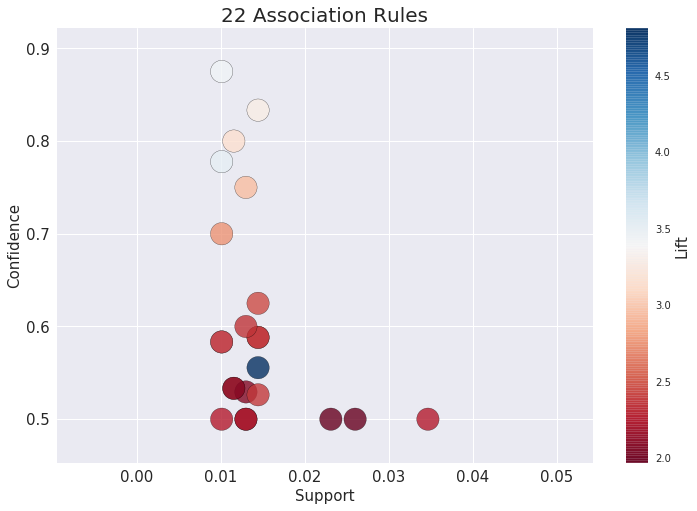

In [17]:
plt.figure(figsize=(12,8))
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])
lift=rules.as_matrix(columns=['lift'])
points=plt.scatter(support, confidence, alpha=0.8,s=500,c=lift,cmap="RdBu",edgecolors='black')
cb=plt.colorbar(points)
cb.set_label(label='Lift',size=15)
plt.title('22 Association Rules',fontsize=20)
plt.xlabel('Support',fontsize=15)
plt.ylabel('Confidence',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()